<a href="https://colab.research.google.com/github/sabaagizew/Casuality_challenge/blob/main/casuality_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import pandas as pd # data processing, CSV file I/O, data manipulation 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
#matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.preprocessing import StandardScaler # for normalization

from sklearn.pipeline import Pipeline # pipeline making
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import svm, datasets # for Support Vector Machine
from sklearn.svm import SVC

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [5]:
df=pd.read_csv('drive/MyDrive/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.shape

(569, 33)

In [7]:
# column names
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [8]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 569 rows and 33 columns


Number of Malignant :  2120
Number of Benign:  3570


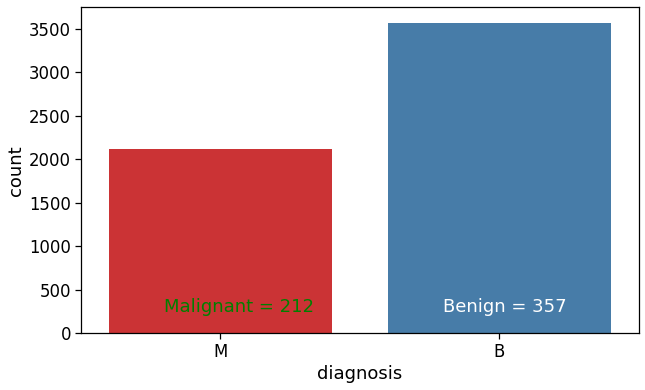

In [12]:
# The frequency of cancer stages
B, M = data['diagnosis'].value_counts()
print('Number of Malignant : ', M)
print('Number of Benign: ', B)

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('diagnosis',data=data, palette="Set1")
plt.annotate('Malignant = 212', xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='green')
plt.annotate('Benign = 357', xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

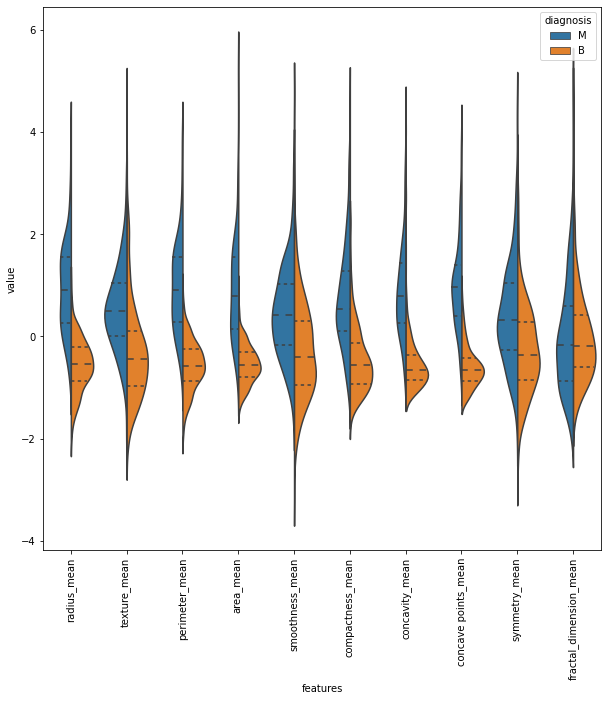

In [11]:
          # Feature Extraction
#Based on their distribution whether that feature will be good for classification.I make violin plots for this dataset,
# first separate the data labels ‘M’ or ‘B’ (into y) and features (into X). Then visualize 10 features at a time.
# y includes diagnosis column with M or B values
y = df.diagnosis
# drop the column 'id' as it is does not convey any useful info
# drop diagnosis since we are separating labels and features 
list = ['id','diagnosis']
# X includes our features
X = df.drop(list,axis = 1)
# get the first ten features
data_dia = y
data = X
data_std = (data-data.mean()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


In [13]:
# first separate the data labels ‘M’ or ‘B’ (into y) and features (into X). Then visualize 10 features at a time.
# y includes diagnosis column with M or B values
y = df.diagnosis
# drop the column 'id' as it is does not convey any useful info
# drop diagnosis since we are separating labels and features 
list = ['id','diagnosis']
# X includes our features
X = df.drop(list,axis = 1)
# get the first ten features
data_dia = y
data = X
data_std = (data-data.se()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


AttributeError: ignored

In [1]:
# first separate the data labels ‘M’ or ‘B’ (into y) and features (into X). Then visualize 10 features at a time.
# y includes diagnosis column with M or B values
y = df.diagnosis
# drop the column 'id' as it is does not convey any useful info
# drop diagnosis since we are separating labels and features 
list = ['id','diagnosis']
# X includes our features
X = df.drop(list,axis = 1)
# get the first ten features
data_dia = y
data = X
data_std = (data-data.worst()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


NameError: ignored

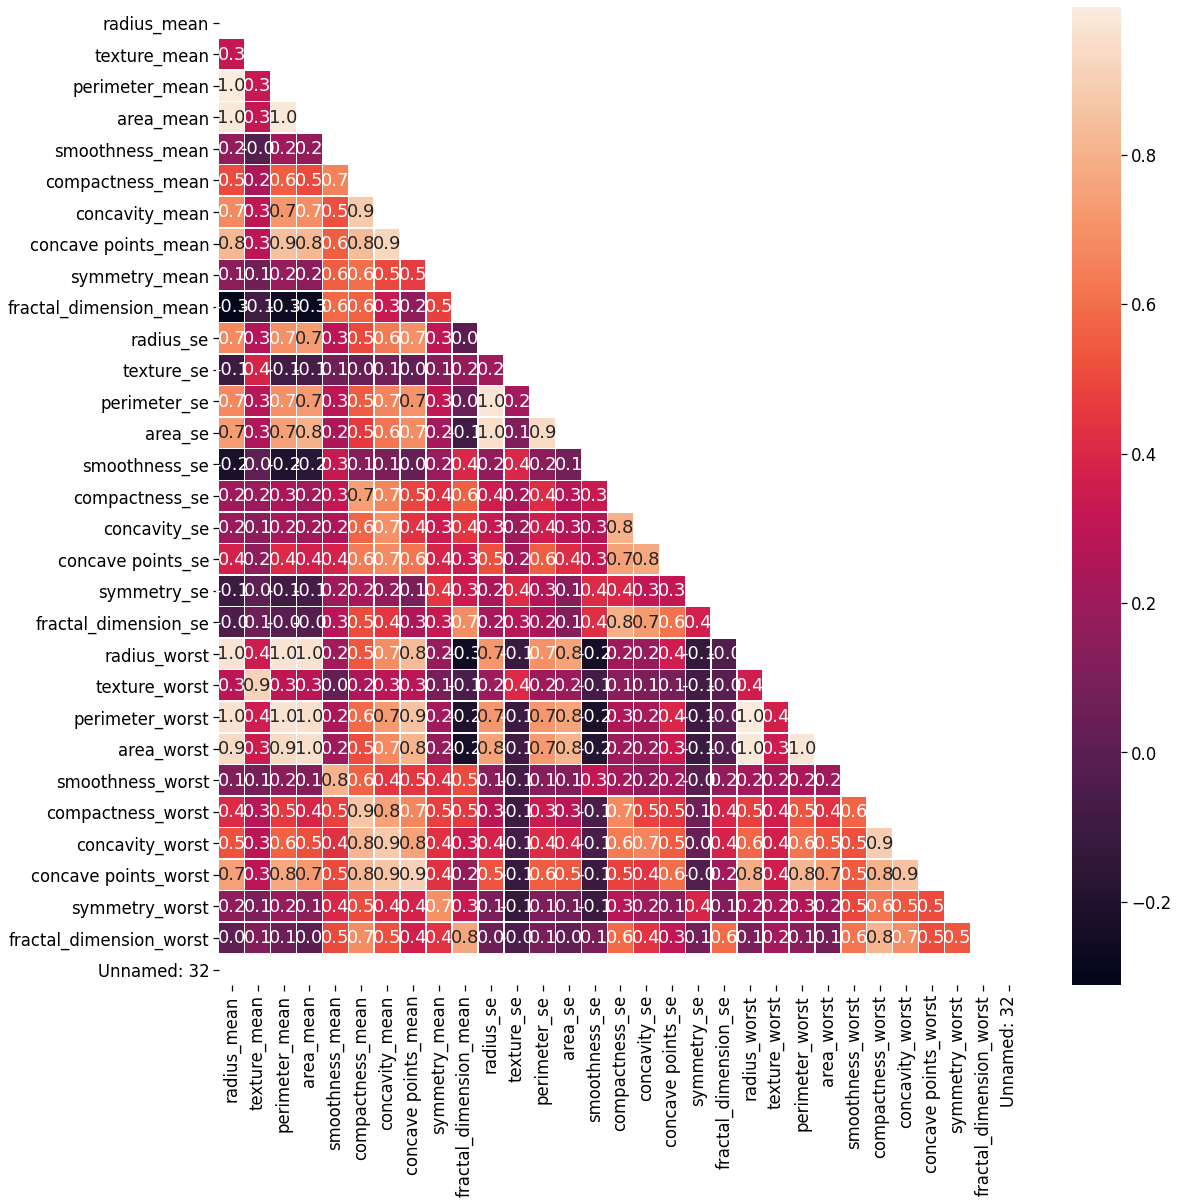

In [ ]:
#In order to check the correlation between the features, I plotted a correlation matrix.
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

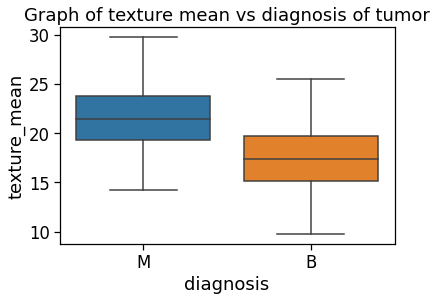

In [ ]:
#In order to understand if there is a difference between the data distribution for malignant and benign groups, 
#I visualized some features via box plots and performed a t test to detect statistical significance.
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='texture_mean', data=df, showfliers=False)
plot.set_title("Graph of texture mean vs diagnosis of tumor")

In [ ]:
# create boxplots for fractal dimension mean vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='fractual_dimension_mean', data=df, showfliers=False)
plot.set_title("Graph of fractual dimension mean vs diagnosis of tumor")

ValueError: ignored

Text(0.5, 1.0, 'Graph of area se vs diagnosis of tumor')

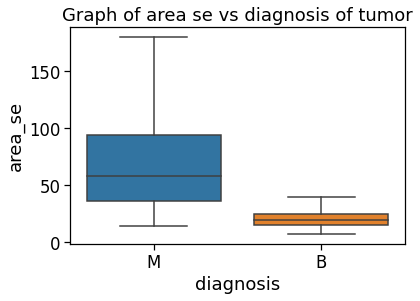

In [ ]:
# create boxplots for area se mean vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='area_se', data=df, showfliers=False)
plot.set_title("Graph of area se vs diagnosis of tumor")


Text(0.5, 1.0, 'Graph of concave points se vs diagnosis of tumor')

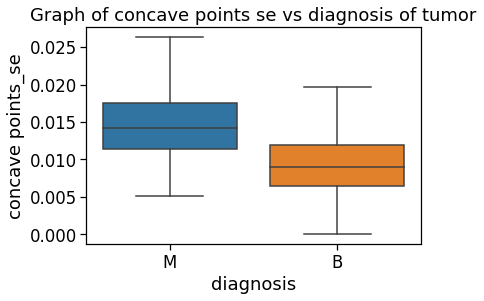

In [ ]:
# create boxplots for concave points se vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='concave points_se', data=df, showfliers=False)
plot.set_title("Graph of concave points se vs diagnosis of tumor")



Text(0.5, 1.0, 'Graph of radius worst vs diagnosis of tumor')

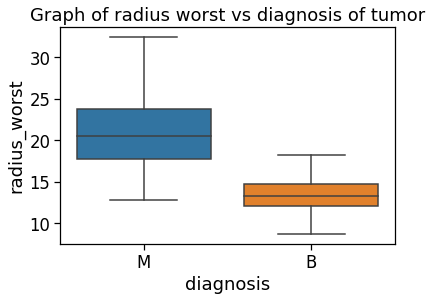

In [ ]:
# create boxplots for radius worst vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='radius_worst', data=df, showfliers=False)
plot.set_title("Graph of radius worst vs diagnosis of tumor")

Text(0.5, 1.0, 'Graph of area worst vs diagnosis of tumor')

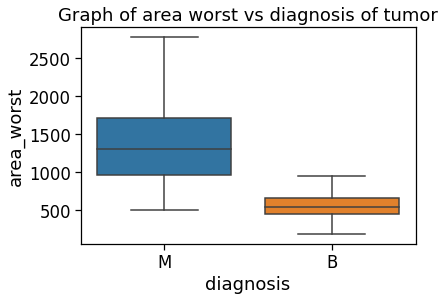

In [ ]:
# create boxplots for area worst vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='area_worst', data=df, showfliers=False)
plot.set_title("Graph of area worst vs diagnosis of tumor")

In [ ]:
# Create correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
X = X.drop(X[to_drop], axis=1)
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Define a function which trains models
def models(X_train,y_train):
    
  #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
  #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
  #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
  #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
  #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    return log, svc_lin, svc_rbf, tree, forest
#get the training results
model = models(X_train,y_train)


NameError: ignored

In [1]:
#RandomForest
impor_Forest=Ran.feature_importances_
indices_1 = np.argsort(impor_Forest)[::-1]

#ExtraTree
impor_Extra_tree=tree_2.feature_importances_
indices_2= np.argsort(impor_Extra_tree)[::-1]

featimp_1 = pd.Series(impor_Forest, index=data.columns[1:]).sort_values(ascending=False)
featimp_2 = pd.Series(impor_Extra_tree, index=data.columns[1:]).sort_values(ascending=False)

Table_impor= pd.DataFrame({'ExtraTree': featimp_2,'Random-Forest': featimp_1})
Table_impor=Table_impor.sort_values('ExtraTree', ascending=False)
print(Table_impor)
print()
print('The six most important features:')
print(featimp_1[0:6])

sns.set_context('notebook', font_scale=1.5)
Table_impor.plot(kind='barh', figsize=(12,10))
plt.title('Feature importance', size=20);

NameError: ignored